In [1]:
import pandas as pd

data = {
    'Date': pd.date_range(start='2025-06-01', periods=500, freq='D').astype(str),
    'Product': ['Laptop', 'Smartphone', 'Tablet'] * (500 // 3) + ['Laptop'] * (500 % 3),
    'Units_Sold': [5, 10, 3, 7, 8, 2, 6, 12, 4, 9] * 50,
    'Unit_Price': [1000, 700, 400, 1000, 700, 400, 1000, 700, 400, 1000] * 50
}



In [2]:
df = pd.DataFrame(data)
print(df)

           Date     Product  Units_Sold  Unit_Price
0    2025-06-01      Laptop           5        1000
1    2025-06-02  Smartphone          10         700
2    2025-06-03      Tablet           3         400
3    2025-06-04      Laptop           7        1000
4    2025-06-05  Smartphone           8         700
..          ...         ...         ...         ...
495  2026-10-09      Laptop           2         400
496  2026-10-10  Smartphone           6        1000
497  2026-10-11      Tablet          12         700
498  2026-10-12      Laptop           4         400
499  2026-10-13      Laptop           9        1000

[500 rows x 4 columns]


In [3]:
revenue_sale_all = df['Units_Sold'] * df['Unit_Price']

In [4]:
#
print(f'Total revenue sales was Pesos {sum(revenue_sale_all)}')

Total revenue sales was Pesos 2580000


In [5]:
total_solve_per_product = df.groupby('Product',as_index=False)['Units_Sold'].sum()
print('total solve per product was')
total_solve_per_product

total solve per product was


,Product,Units_Sold
0,Laptop,1101
1,Smartphone,1104
2,Tablet,1095


In [6]:
#import matplotlib as plt for plot
import matplotlib.pyplot as plt



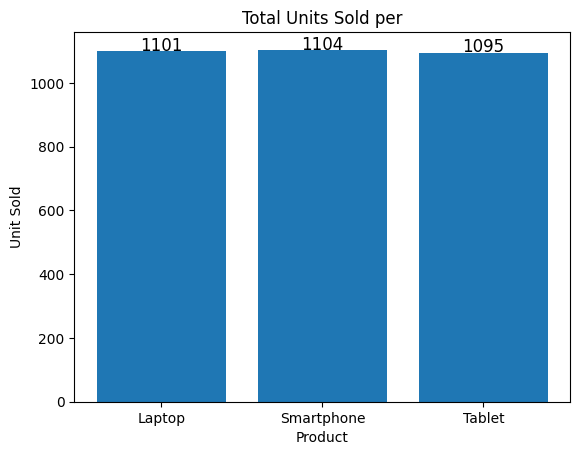

In [7]:
plt.bar(total_solve_per_product['Product'], total_solve_per_product['Units_Sold'])
plt.xlabel('Product')
plt.ylabel('Unit Sold')
plt.title("Total Units Sold per")


#show numbers at top
for index,value in enumerate(total_solve_per_product['Units_Sold']):
    plt.text(index,value + 1,str(value),ha='center',fontsize=12)

plt.show()

In [8]:
print(df)

           Date     Product  Units_Sold  Unit_Price
0    2025-06-01      Laptop           5        1000
1    2025-06-02  Smartphone          10         700
2    2025-06-03      Tablet           3         400
3    2025-06-04      Laptop           7        1000
4    2025-06-05  Smartphone           8         700
..          ...         ...         ...         ...
495  2026-10-09      Laptop           2         400
496  2026-10-10  Smartphone           6        1000
497  2026-10-11      Tablet          12         700
498  2026-10-12      Laptop           4         400
499  2026-10-13      Laptop           9        1000

[500 rows x 4 columns]


In [9]:
revenue_per_day = []

for i in range(500):
    sold = df['Units_Sold'][i]
    income = df['Unit_Price'][i]
    revenue_per_day.append(sold * income)

In [10]:
# get Daily add new Data to dataframe which is Daily_Revenue
df['Daily_Revenue'] = revenue_per_day
print(df)

           Date     Product  Units_Sold  Unit_Price  Daily_Revenue
0    2025-06-01      Laptop           5        1000           5000
1    2025-06-02  Smartphone          10         700           7000
2    2025-06-03      Tablet           3         400           1200
3    2025-06-04      Laptop           7        1000           7000
4    2025-06-05  Smartphone           8         700           5600
..          ...         ...         ...         ...            ...
495  2026-10-09      Laptop           2         400            800
496  2026-10-10  Smartphone           6        1000           6000
497  2026-10-11      Tablet          12         700           8400
498  2026-10-12      Laptop           4         400           1600
499  2026-10-13      Laptop           9        1000           9000

[500 rows x 5 columns]


In [11]:
average_daily_revenue = df['Daily_Revenue'].mean()
print(f'Daily average revenue total Pesos {average_daily_revenue}')

Daily average revenue total Pesos 5160.0


In [12]:
#get product revenue
product_has_highest_revenue = df.groupby('Product',as_index=False)['Daily_Revenue'].sum()



In [13]:
#get the product with highest revenue
print(f"product with highest revenue")
print(product_has_highest_revenue.max())

product with highest revenue
Product          Tablet
Daily_Revenue    865200
dtype: object


In [14]:
df['Revenue_Change'] = df['Daily_Revenue'].diff()
df['Revenue_Percent_Change'] = df['Daily_Revenue'].pct_change() * 100




In [15]:
print(df)

           Date     Product  Units_Sold  Unit_Price  Daily_Revenue  \
0    2025-06-01      Laptop           5        1000           5000   
1    2025-06-02  Smartphone          10         700           7000   
2    2025-06-03      Tablet           3         400           1200   
3    2025-06-04      Laptop           7        1000           7000   
4    2025-06-05  Smartphone           8         700           5600   
..          ...         ...         ...         ...            ...   
495  2026-10-09      Laptop           2         400            800   
496  2026-10-10  Smartphone           6        1000           6000   
497  2026-10-11      Tablet          12         700           8400   
498  2026-10-12      Laptop           4         400           1600   
499  2026-10-13      Laptop           9        1000           9000   

     Revenue_Change  Revenue_Percent_Change  
0               NaN                     NaN  
1            2000.0               40.000000  
2           -5800.0  

In [16]:
df['Rolling_Avg'] = df['Daily_Revenue'].rolling(window=7).mean()

In [17]:
print(df)

           Date     Product  Units_Sold  Unit_Price  Daily_Revenue  \
0    2025-06-01      Laptop           5        1000           5000   
1    2025-06-02  Smartphone          10         700           7000   
2    2025-06-03      Tablet           3         400           1200   
3    2025-06-04      Laptop           7        1000           7000   
4    2025-06-05  Smartphone           8         700           5600   
..          ...         ...         ...         ...            ...   
495  2026-10-09      Laptop           2         400            800   
496  2026-10-10  Smartphone           6        1000           6000   
497  2026-10-11      Tablet          12         700           8400   
498  2026-10-12      Laptop           4         400           1600   
499  2026-10-13      Laptop           9        1000           9000   

     Revenue_Change  Revenue_Percent_Change  Rolling_Avg  
0               NaN                     NaN          NaN  
1            2000.0               40.0000

In [18]:
print(df)

           Date     Product  Units_Sold  Unit_Price  Daily_Revenue  \
0    2025-06-01      Laptop           5        1000           5000   
1    2025-06-02  Smartphone          10         700           7000   
2    2025-06-03      Tablet           3         400           1200   
3    2025-06-04      Laptop           7        1000           7000   
4    2025-06-05  Smartphone           8         700           5600   
..          ...         ...         ...         ...            ...   
495  2026-10-09      Laptop           2         400            800   
496  2026-10-10  Smartphone           6        1000           6000   
497  2026-10-11      Tablet          12         700           8400   
498  2026-10-12      Laptop           4         400           1600   
499  2026-10-13      Laptop           9        1000           9000   

     Revenue_Change  Revenue_Percent_Change  Rolling_Avg  
0               NaN                     NaN          NaN  
1            2000.0               40.0000

In [19]:
print(df.dtypes)

Date                       object
Product                    object
Units_Sold                  int64
Unit_Price                  int64
Daily_Revenue               int64
Revenue_Change            float64
Revenue_Percent_Change    float64
Rolling_Avg               float64
dtype: object


In [20]:
#convert object into datetime 
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Date                      datetime64[ns]
Product                           object
Units_Sold                         int64
Unit_Price                         int64
Daily_Revenue                      int64
Revenue_Change                   float64
Revenue_Percent_Change           float64
Rolling_Avg                      float64
dtype: object


In [21]:
#get weekly revenue for or finance

df['Week'] = df['Date'].dt.to_period('W').apply(lambda x: x.start_time)

weekly = df.groupby('Week')['Daily_Revenue'].sum().reset_index()
weekly.columns = ['Week','Weekly_Revenue']

print(weekly)

         Week  Weekly_Revenue
0  2025-05-26            5000
1  2025-06-02           36000
2  2025-06-09           36400
3  2025-06-16           37800
4  2025-06-23           30600
..        ...             ...
68 2026-09-14           32600
69 2026-09-21           39200
70 2026-09-28           36400
71 2026-10-05           36000
72 2026-10-12           10600

[73 rows x 2 columns]


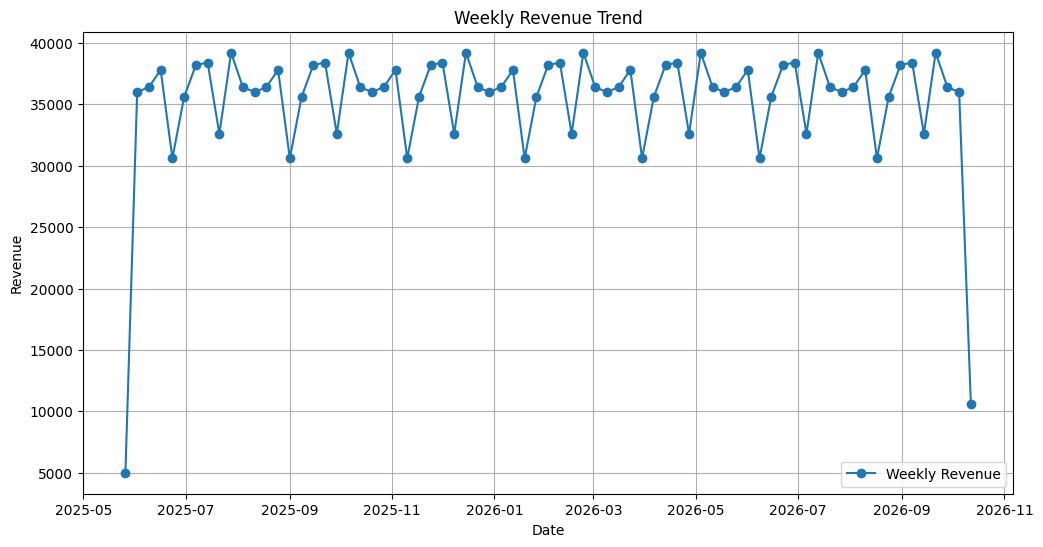

In [22]:

plt.figure(figsize=(12,6))
plt.plot(weekly['Week'], weekly['Weekly_Revenue'], marker='o', linestyle='-', label='Weekly Revenue')
plt.xlabel('Date')
plt.ylabel("Revenue")
plt.title('Weekly Revenue Trend')
plt.legend()
plt.grid()
plt.show()


In [25]:
#get monthly revenue for  or finance

df['Monthly'] = df['Date'].dt.to_period('M').apply(lambda x: x.start_time)
monthly = df.groupby('Monthly')['Daily_Revenue'].sum().reset_index()
monthly.columns = ['Monthly','Monthly_Revenue']
print(monthly)

      Monthly  Monthly_Revenue
0  2025-06-01           154800
1  2025-07-01           159800
2  2025-08-01           161800
3  2025-09-01           154800
4  2025-10-01           156000
5  2025-11-01           154800
6  2025-12-01           161800
7  2026-01-01           160400
8  2026-02-01           142200
9  2026-03-01           161800
10 2026-04-01           154800
11 2026-05-01           160400
12 2026-06-01           154800
13 2026-07-01           155600
14 2026-08-01           160800
15 2026-09-01           154800
16 2026-10-01            70600


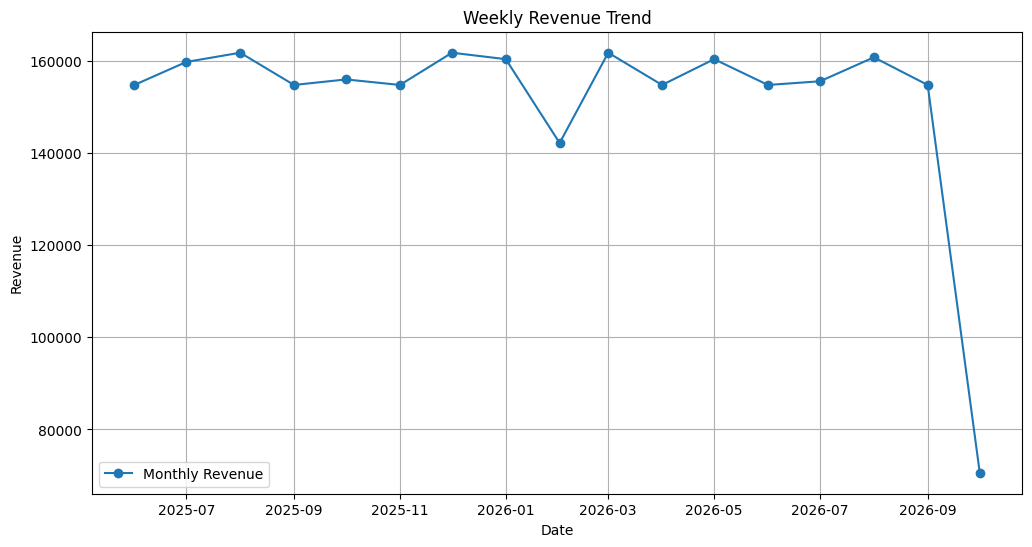

In [26]:
plt.figure(figsize=(12,6))
plt.plot(monthly['Monthly'],monthly['Monthly_Revenue'],marker='o',linestyle='-',label='Monthly Revenue')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title('Weekly Revenue Trend')
plt.legend()
plt.grid()
plt.show()

In [32]:
#get highest sale in  what month?
highest_sale_month = monthly['Monthly_Revenue'].idxmax()
print("get the highest sale in revenue what month was")
print(monthly.loc[highest_sale_month])

get the highest sale in revenue what month was
Monthly            2025-08-01 00:00:00
Monthly_Revenue                 161800
Name: 2, dtype: object


In [ ]:
#get 3 months with largest revenue
months_3_highest_revenue = monthly.nlargest(3, 'Monthly_Revenue')
print("Get months that has highest Revenue")
print(months_3_highest_revenue)

     Monthly  Monthly_Revenue
2 2025-08-01           161800
6 2025-12-01           161800
9 2026-03-01           161800


In [37]:
#get product per sale statistic

product_sales_stats = df.groupby('Product')['Units_Sold'].agg(['mean','median','std']).reset_index()

print(product_sales_stats)

      Product      mean  median       std
0      Laptop  6.553571     6.0  3.030304
1  Smartphone  6.650602     7.0  3.038874
2      Tablet  6.596386     6.5  3.076753


In [38]:
#get the most consistent sale by product was 

consitent_product = product_sales_stats.nlargest(1,'std')
print('The most consistent product we have was')
print(consitent_product)

The most consistent product we have was
  Product      mean  median       std
2  Tablet  6.596386     6.5  3.076753


In [42]:
no_sales_days = df[df['Daily_Revenue'] == 0]


In [ ]:
print('Check if there  is Daily Revenue that equal to Zero')
print(no_sales_days)

Empty DataFrame
Columns: [Date, Product, Units_Sold, Unit_Price, Daily_Revenue, Revenue_Change, Revenue_Percent_Change, Rolling_Avg, Week, Monthly]
Index: []
